- 텍스트 기반 요약보다 시각화가 데이터 해석을 설명하기에 좋음
  - 꺾은 선형 차트: 시간에 따른 추세를 빠르게 전달 가능
  - 막대 그래프: 고유한 범주와 각 개수를 명확하게 식별 가능
  - 원형 차트: 쉽게 소화할 수 있는 방식으로 비율을 나타냄
- matplotlib, seaborn, ggplot 등 파이썬 데이터 시각화 라이브러리 사용

# matplotlib 설치
```
conda activate (가상환경 이름)
conda install matplotlib
```

# 선형 차트
- 주피터 노트북은 별도의 브라우저 창에서 각 matplotplib 시각화를 렌더링
- 주피터가 셀의 코드 바로 아래에 시각화를 렌더링하도록 매직함수를 이용
`%matplotlib inline`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pd.read_csv("space_missions.csv").head()

,Date,Company Name,Location,Cost,Status
0,2/5/19,Arianespace,France,200.00,Success
1,2/22/19,SpaceX,USA,50.00,Success
2,3/2/19,SpaceX,USA,50.00,Success
3,3/9/19,CASC,China,29.15,Success
4,3/22/19,Arianespace,France,37.00,Success


In [15]:
space = pd.read_csv(
    "space_missions.csv",
    parse_dates = ["Date"],
    date_format="%Y-%m-%d",
    index_col = "Date"
)
space.head()

,Company Name,Location,Cost,Status
Date,,,,
2/5/19,Arianespace,France,200.00,Success
2/22/19,SpaceX,USA,50.00,Success
3/2/19,SpaceX,USA,50.00,Success
3/9/19,CASC,China,29.15,Success
3/22/19,Arianespace,France,37.00,Success


- 시계열 그래프(timeseries graph): 시간 경과에 따른 추세를 관찰하기 좋은 그래프
  - x축에 시간, y축에 값을 표시

In [16]:
space["Cost"].head()

Date
2/5/19     200.00
2/22/19     50.00
3/2/19      50.00
3/9/19      29.15
3/22/19     37.00
Name: Cost, dtype: float64

<Axes: xlabel='Date'>

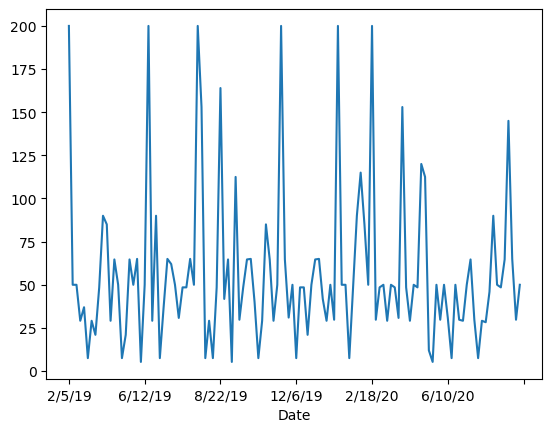

In [18]:
#판다스 자료구조에서 plot 메서드를 호출하면 시각화를 렌더링 가능
space["Cost"].plot()

<Axes: xlabel='Date'>

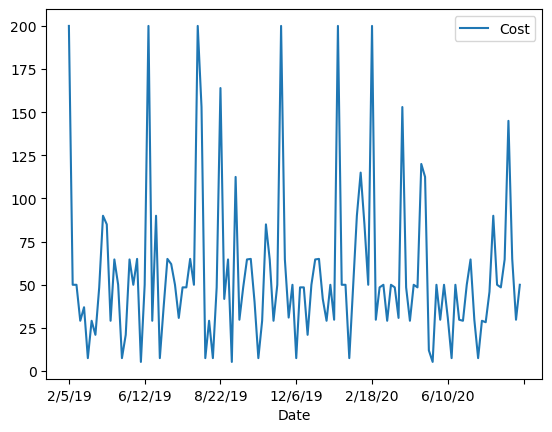

In [19]:
#데이터셋에 숫자 열이 하나만 존재하는 경우
space.plot()

In [20]:
#데이터셋에 숫자 열이 여러 개 있는 경우 + 열 사이의 값 크기에 큰 차이가 있는 경우
data = [
    [2000, 3000000],
    [5000, 5000000]
]
df = pd.DataFrame(data = data, columns = ["Small", "Large"])
df

,Small,Large
0,2000,3000000
1,5000,5000000


<Axes: >

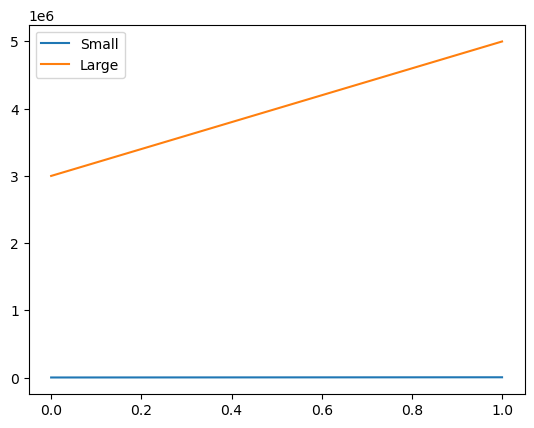

In [21]:
df.plot()

<Axes: xlabel='Date'>

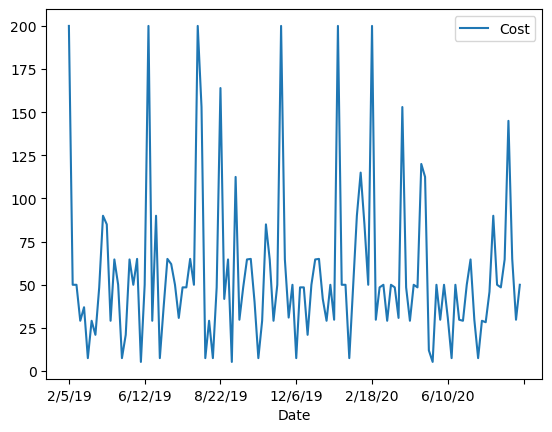

In [22]:
#plot 메서드의 y매개변수: matplotlib에 값을 표시해야하는 DataFrame의 열을 식별
space.plot(y = "Cost")

<Axes: xlabel='Date'>

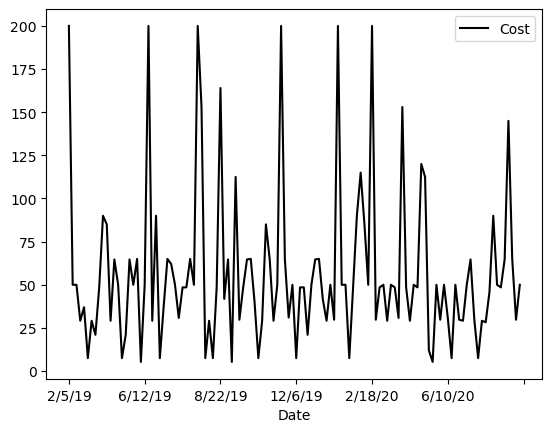

In [23]:
#plot 메서드의 colormap 매개변수: 시각화의 색상 테마 설정
space.plot(y = "Cost", colormap = "gray")

In [24]:
#colormap 매개변수의 유효한 인수 목록->pyplot 라이브러리에서 colormaps 메서드 호출
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

# 막대 그래프
- 막대 그래프는 데이터셋의 고유값 수를 표시할 때 활용하기 좋음

<Axes: xlabel='Company Name'>

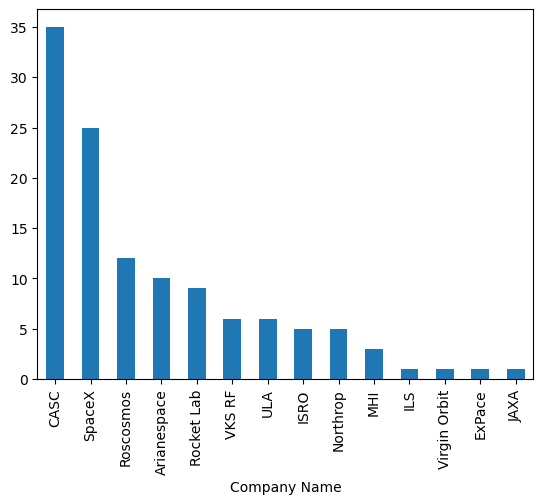

In [25]:
#plot 메서드의 kind 매개변수: matplotlib가 렌더링하는 차트 유형을 설정
space["Company Name"].value_counts().plot(kind = "bar")

<Axes: ylabel='Company Name'>

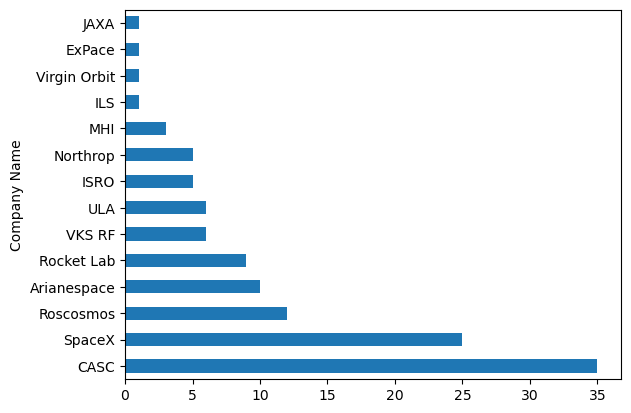

In [26]:
space["Company Name"].value_counts().plot(kind = "barh")

# 파이 차트
- 색상 조각이 합쳐져 하나의 원형 파이를 형성하는 시각화
- 각 조각은 전체 양에 기여하는 비율을 시각적으로 나타냄

<Axes: ylabel='count'>

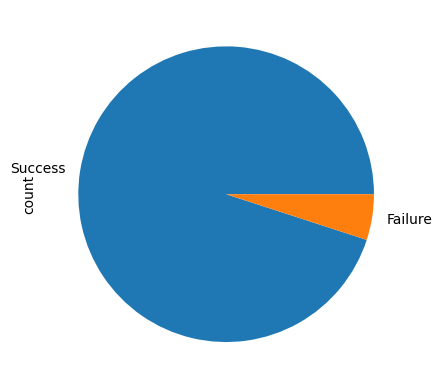

In [28]:
space["Status"].value_counts().plot(kind = "pie")

<Axes: ylabel='count'>

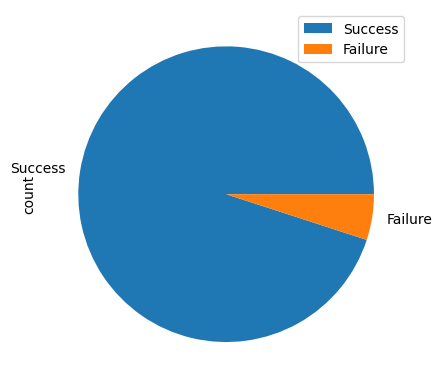

In [29]:
#legend 매개변수: 시각화에 범례를 추가하는지 여부
space["Status"].value_counts().plot(kind = "pie", legend = True)